In [3]:
import pandas as pd

df = pd.read_csv('winequality-red.csv')
print(df.shape)
print(df.info())
print(df.describe())

(1599, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000 

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


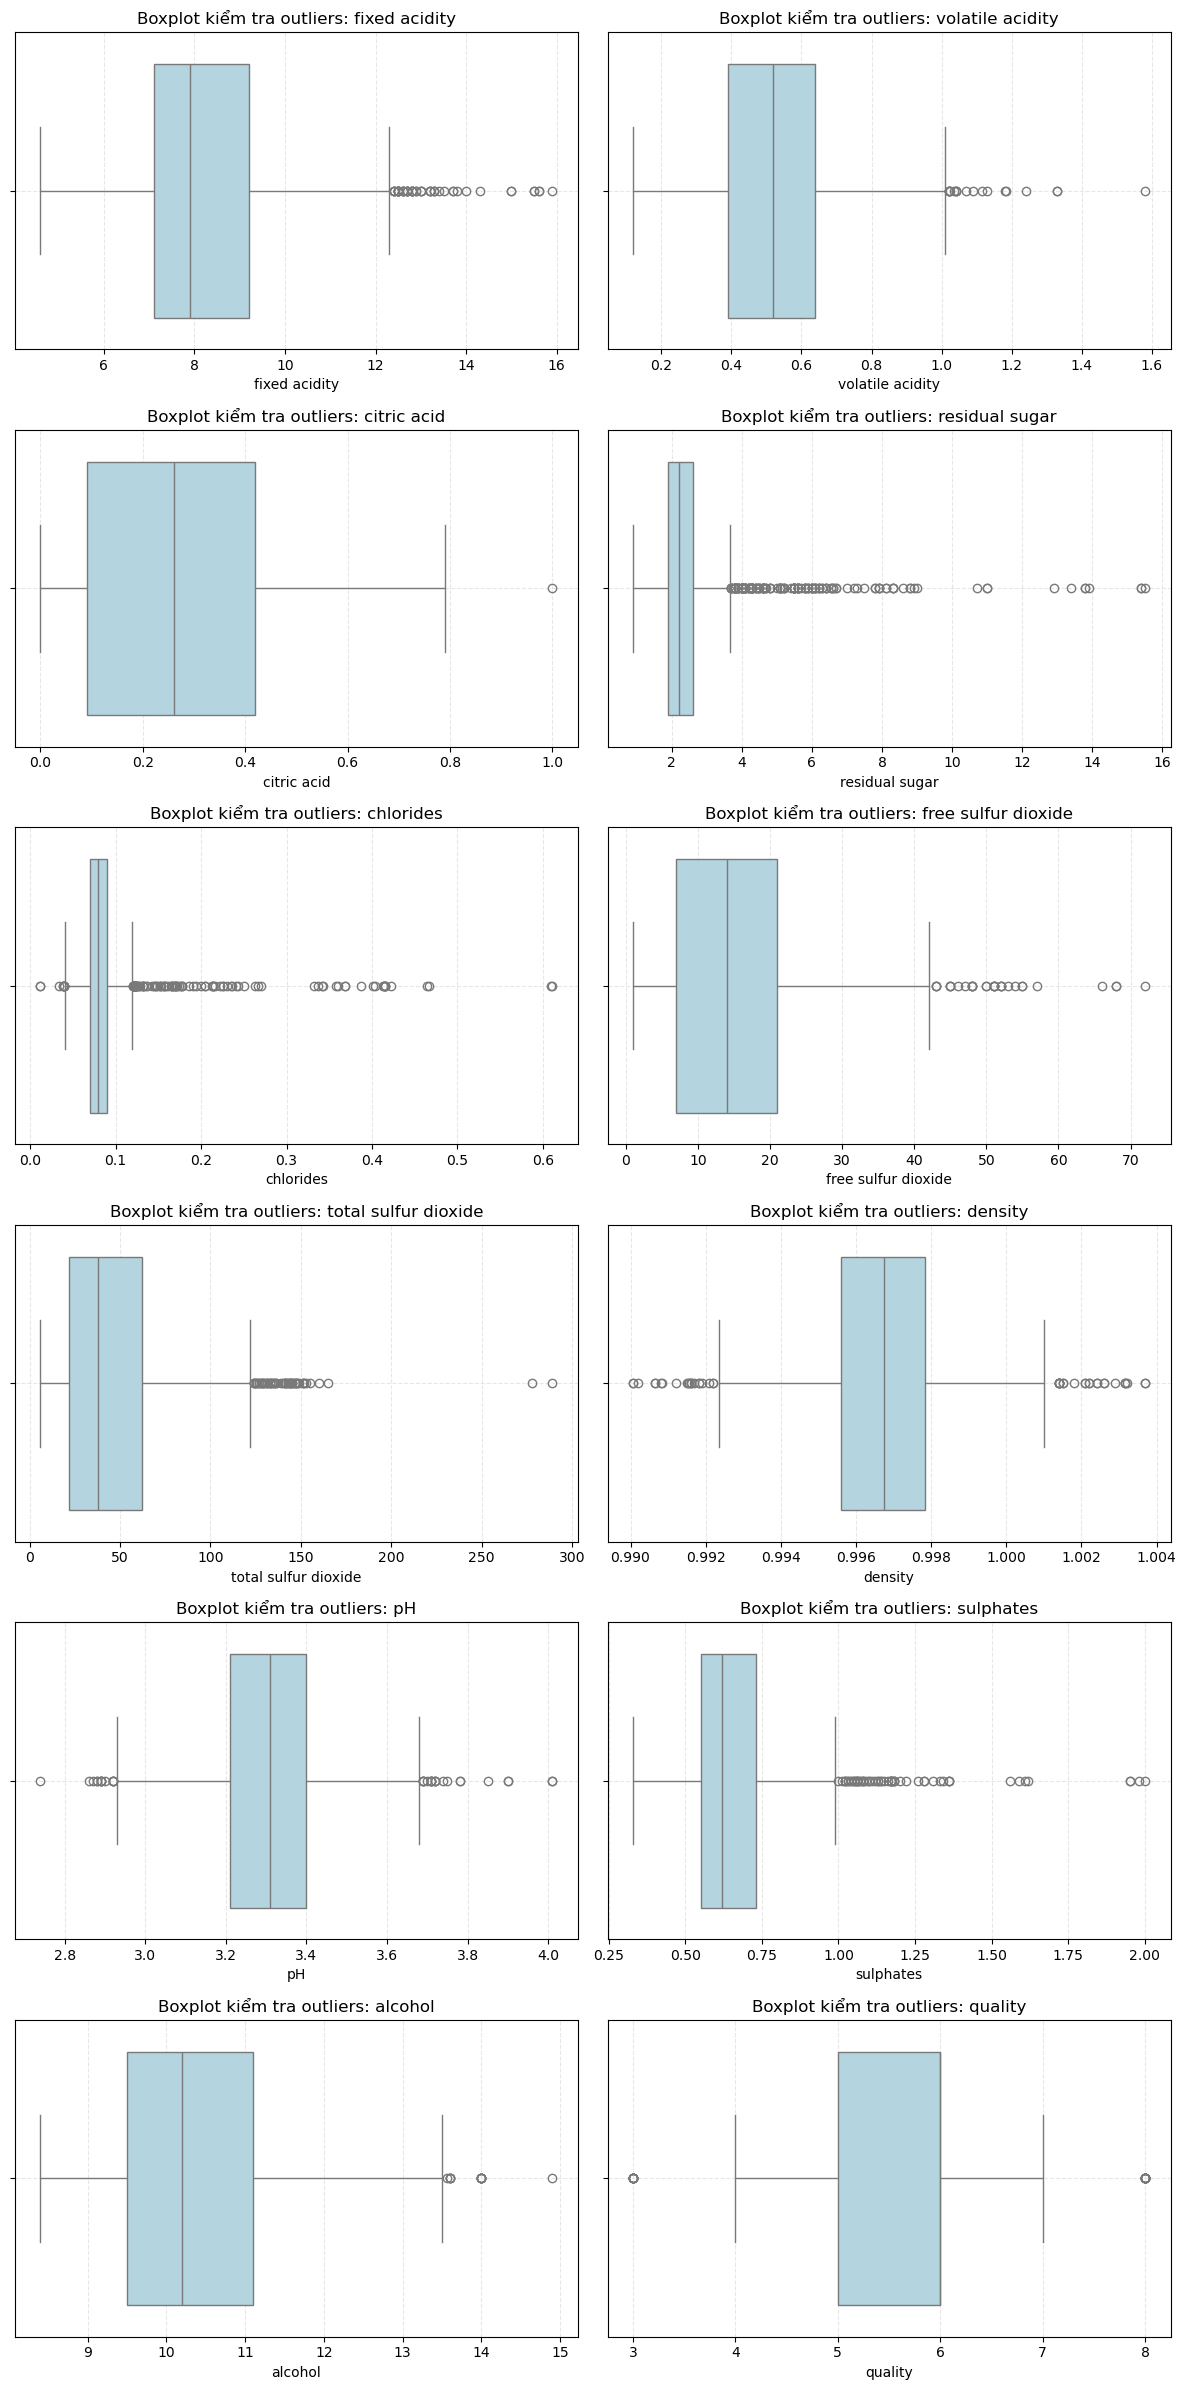

In [5]:
# Kiểm tra giá trị thiếu
print(df.isnull().sum())

# Vẽ boxplot kiểm tra outliers
import matplotlib.pyplot as plt
import seaborn as sns

cols = 2
features = df.columns
rows = (len(features) + cols - 1) // cols
fig, axes = plt.subplots(rows, cols, figsize=(cols * 6, rows * 4))
axes = axes.flatten()

for i, col in enumerate(features):
    sns.boxplot(x=df[col], ax=axes[i], color='lightblue')
    axes[i].set_title(f'Boxplot kiểm tra outliers: {col}', fontsize=12)
    axes[i].grid(True, linestyle='--', alpha=0.3)

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.savefig("7.png", dpi=300)
plt.show()

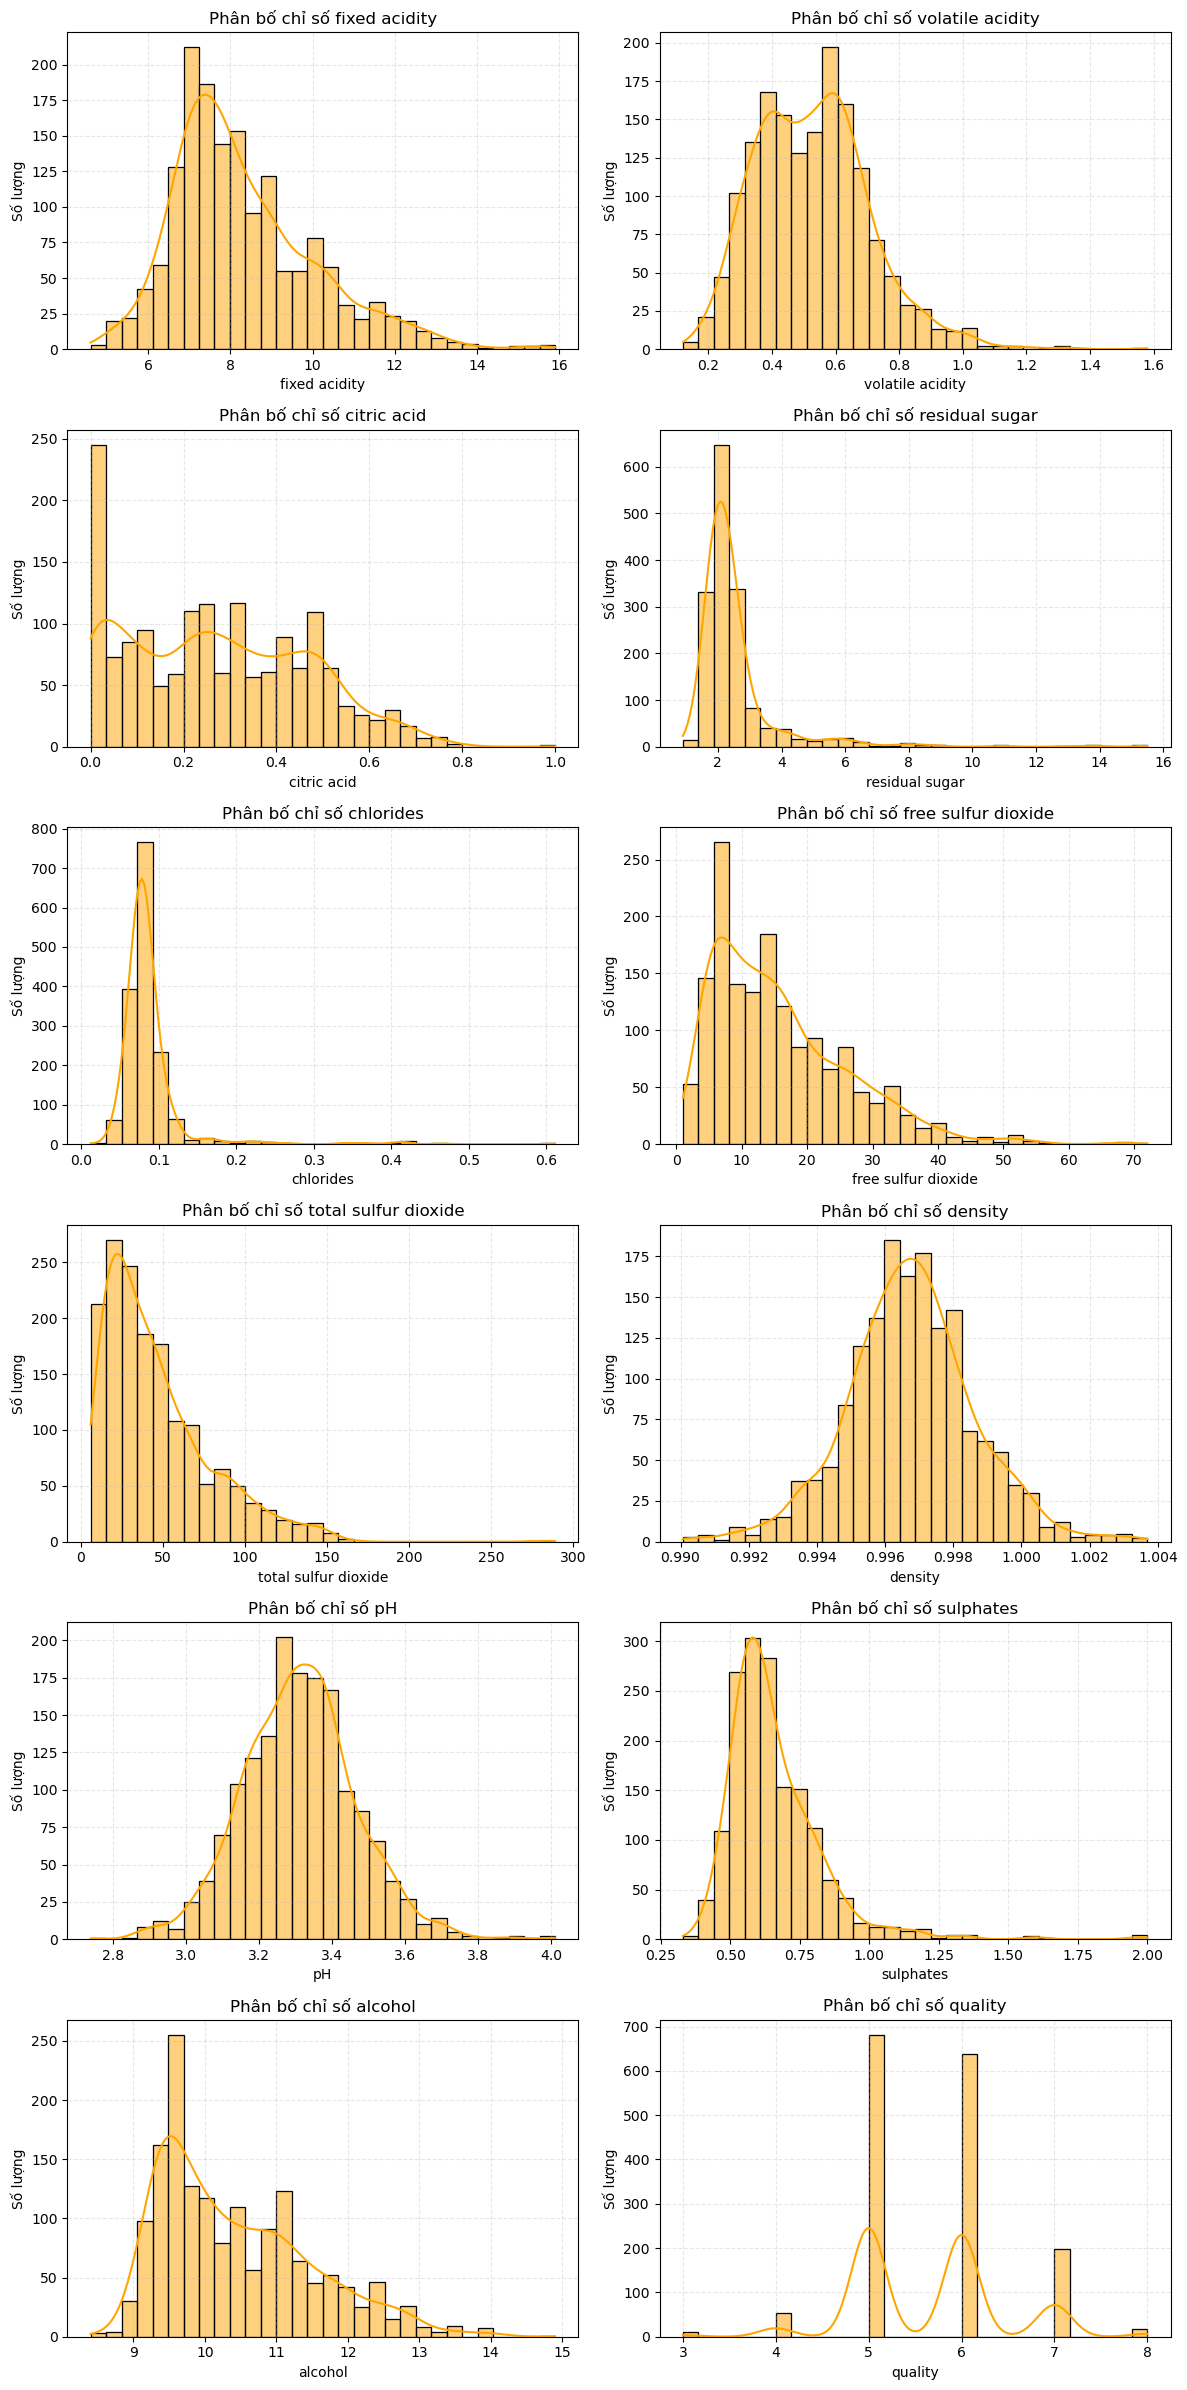

In [6]:
cols = 2
rows = (len(features) + cols - 1) // cols
fig, axes = plt.subplots(rows, cols, figsize=(cols * 6, rows * 4))
axes = axes.flatten()

for i, col in enumerate(features):
    sns.histplot(df[col], kde=True, bins=30, color='orange', ax=axes[i])
    axes[i].set_title(f'Phân bố chỉ số {col}', fontsize=12)
    axes[i].set_xlabel(col, fontsize=10)
    axes[i].set_ylabel('Số lượng', fontsize=10)
    axes[i].grid(True, linestyle='--', alpha=0.3)

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.savefig("8.png", dpi=300)
plt.show()

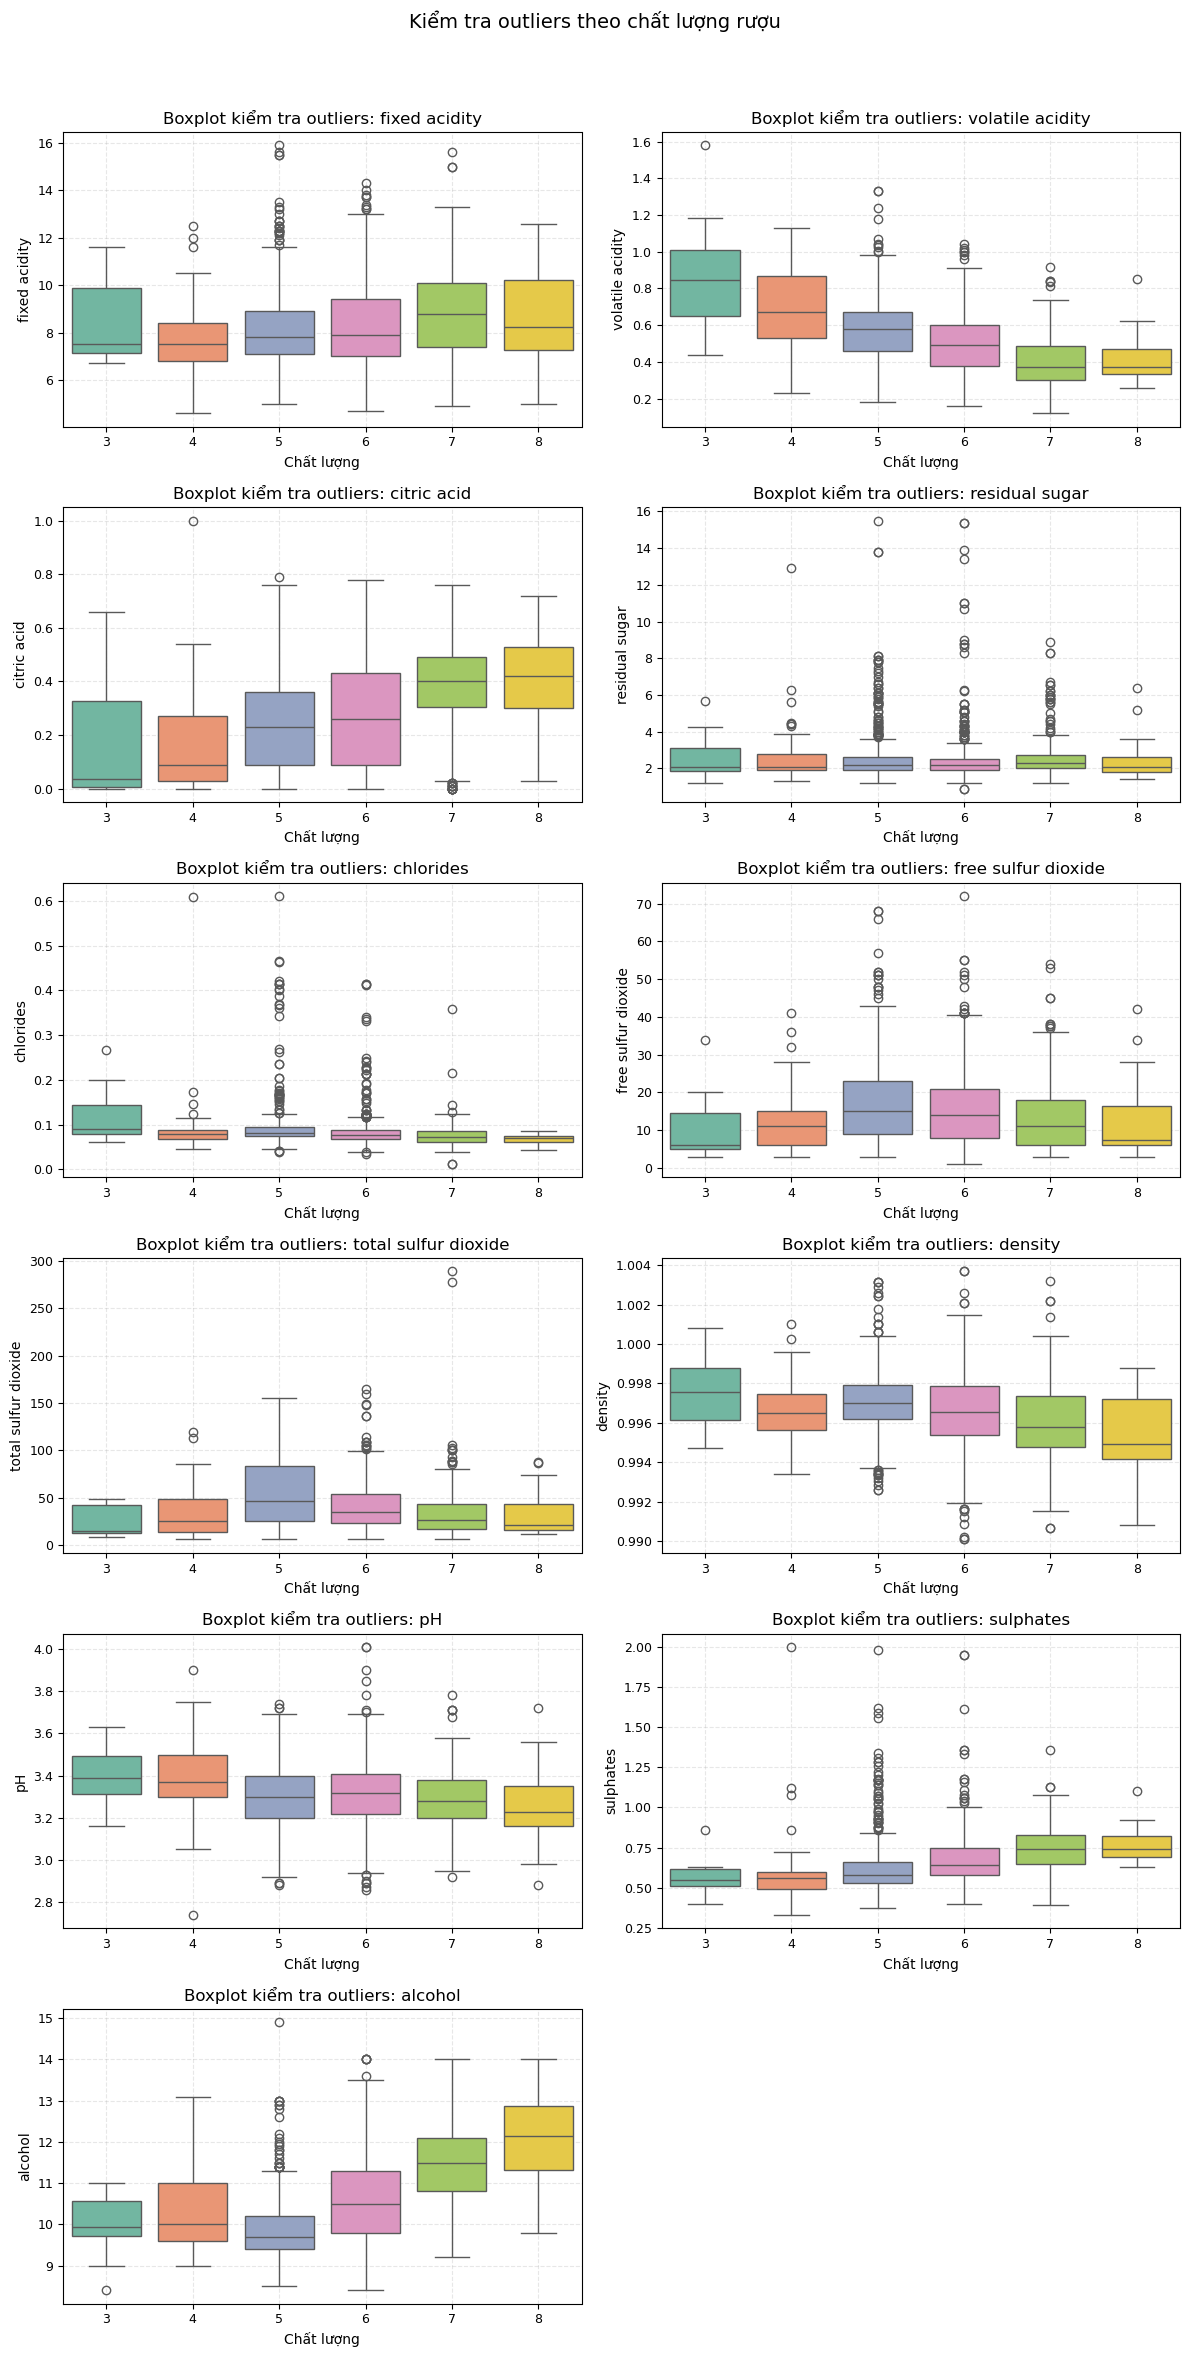

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

columns = df.columns.drop('quality')  # bỏ quality vì đã dùng làm phân nhóm
cols = 2
rows = (len(columns) + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(cols * 6, rows * 4))
axes = axes.flatten()

for i, col in enumerate(columns):
    sns.boxplot(x='quality', y=col, hue='quality', data=df,
                palette='Set2', legend=False, ax=axes[i])
    axes[i].set_title(f'Boxplot kiểm tra outliers: {col}', fontsize=12)
    axes[i].set_xlabel('Chất lượng', fontsize=10)
    axes[i].set_ylabel(col, fontsize=10)
    axes[i].tick_params(axis='both', labelsize=9)
    axes[i].grid(True, linestyle='--', alpha=0.3)

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle('Kiểm tra outliers theo chất lượng rượu', fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig("9.png", dpi=300)
plt.show()

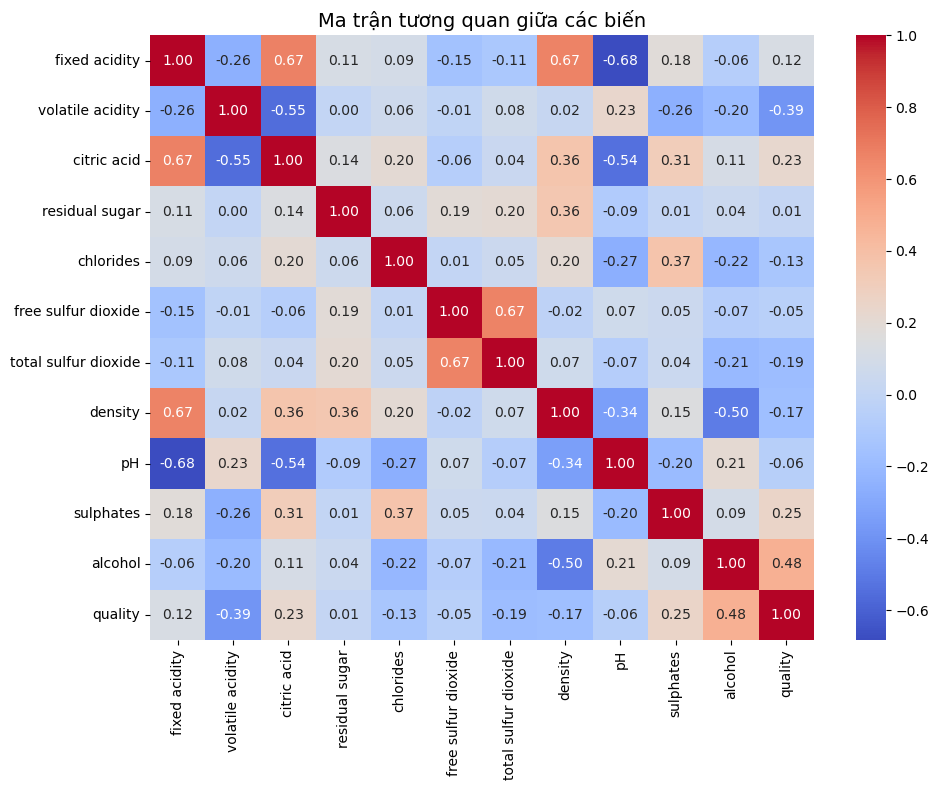

In [12]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Ma trận tương quan giữa các biến', fontsize=14)
plt.tight_layout()
plt.savefig("10.png", dpi=300)
plt.show()

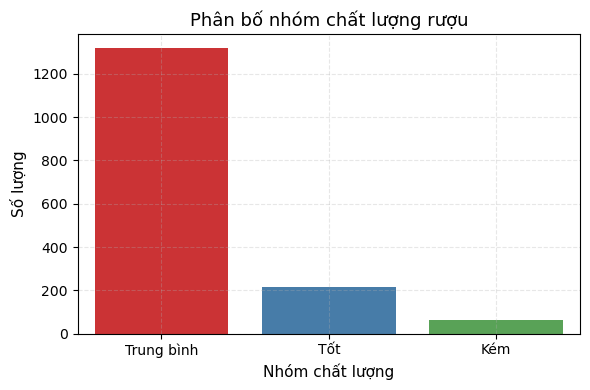

In [18]:
df['quality_label'] = df['quality'].apply(lambda x: 'Tốt' if x >= 7 else ('Trung bình' if x >= 5 else 'Kém'))
# Vẽ biểu đồ phân bố nhóm chất lượng rượu
plt.figure(figsize=(6, 4))
sns.countplot(x='quality_label', hue='quality_label', data=df, palette='Set1')
plt.title('Phân bố nhóm chất lượng rượu', fontsize=13)
plt.xlabel('Nhóm chất lượng', fontsize=11)
plt.ylabel('Số lượng', fontsize=11)
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.savefig("11.png", dpi=300)
plt.show()

In [8]:
from sklearn.preprocessing import StandardScaler

X = df.drop(['quality', 'quality_label'], axis=1)
y = df['quality_label']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)